<a href="https://colab.research.google.com/github/mrtkp9993/FinanceExamplesPy/blob/main/01_calculate_alpha_and_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from arch.unitroot import VarianceRatio
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

<IPython.core.display.Javascript object>

In [4]:
kozaa = yf.download("KOZAA.IS", period="max", start="2006-01-03")
bist30 = yf.download("XU030.IS", period="max", start="2006-01-03")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

In [5]:
# fixing data
# Fix bist30 data
# 2020-07-19
bist30.loc[:"2020-07-24"] = bist30.loc[:"2020-07-24"] / 100

# Fix bist30 missing data
bist30 = bist30.reindex(kozaa.index.values, method="pad")

<IPython.core.display.Javascript object>

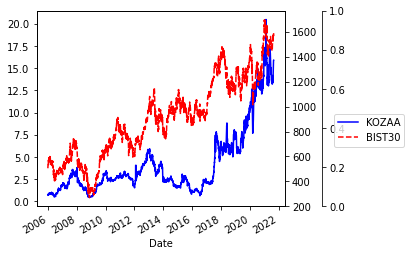

<IPython.core.display.Javascript object>

In [6]:
fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines["right"]
rspine.set_position(("axes", 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

kozaa["Adj Close"].plot(ax=ax, style="b-")
bist30["Adj Close"].plot(ax=ax, style="r--", secondary_y=True)
ax3.legend(
    [ax.get_lines()[0], ax.right_ax.get_lines()[0]],
    ["KOZAA", "BIST30"],
    bbox_to_anchor=(1.5, 0.5),
)

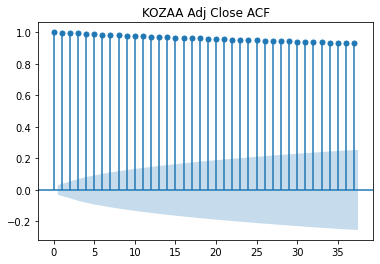

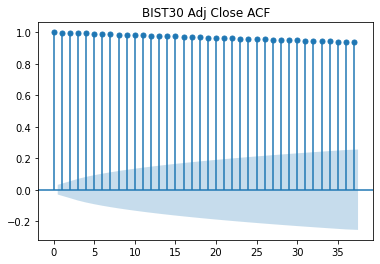

<IPython.core.display.Javascript object>

In [7]:
plot_acf(kozaa["Adj Close"], title="KOZAA Adj Close ACF")
plot_acf(bist30["Adj Close"], title="BIST30 Adj Close ACF")
plt.show()

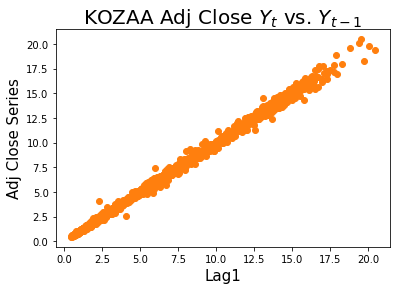

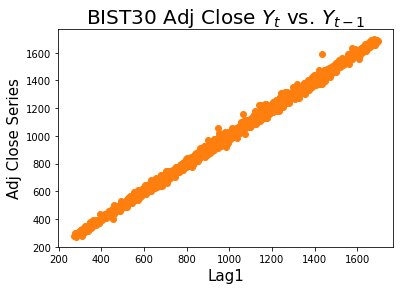

<IPython.core.display.Javascript object>

In [8]:
fig, ax = plt.subplots()
_ = ax.scatter(kozaa["Adj Close"], kozaa["Adj Close"].shift(1), color="C1")
_ = ax.set_xlabel("Lag1", fontsize=15)
_ = ax.set_ylabel("Adj Close Series", fontsize=15)
_ = ax.set_title("KOZAA Adj Close $Y_t$ vs. $Y_{t-1}$", fontsize=20)

fig, ax = plt.subplots()
_ = ax.scatter(bist30["Adj Close"], bist30["Adj Close"].shift(1), color="C1")
_ = ax.set_xlabel("Lag1", fontsize=15)
_ = ax.set_ylabel("Adj Close Series", fontsize=15)
_ = ax.set_title("BIST30 Adj Close $Y_t$ vs. $Y_{t-1}$", fontsize=20)

plt.show()

In [9]:
# Returns
kozaa_ret = (np.log(kozaa["Adj Close"]) - np.log(kozaa["Adj Close"].shift(1))).dropna()
bist30_ret = (
    np.log(bist30["Adj Close"]) - np.log(bist30["Adj Close"].shift(1))
).dropna()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Date'>

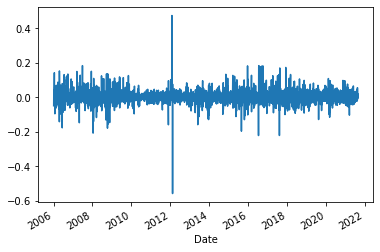

<IPython.core.display.Javascript object>

In [10]:
kozaa_ret.plot()

<AxesSubplot:xlabel='Date'>

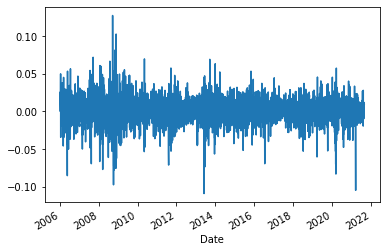

<IPython.core.display.Javascript object>

In [11]:
bist30_ret.plot()

C:\Users\murat\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


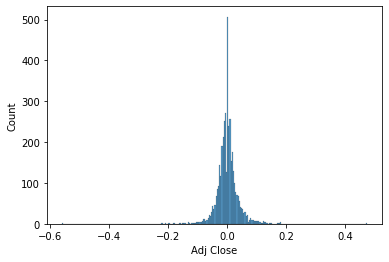

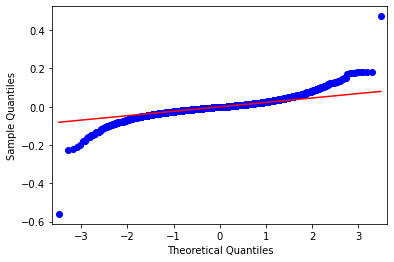

<IPython.core.display.Javascript object>

In [12]:
sns.histplot(kozaa_ret)
qqplot(kozaa_ret, line="q")
plt.show()

C:\Users\murat\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


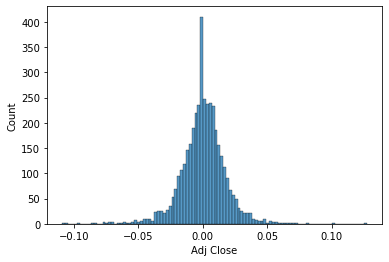

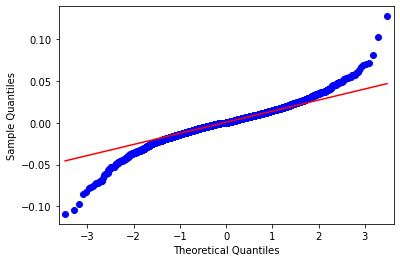

<IPython.core.display.Javascript object>

In [13]:
sns.histplot(bist30_ret)
qqplot(bist30_ret, line="q")
plt.show()

In [14]:
VarianceRatio(kozaa_ret, 252)

Test Statistic,-3.126
P-value,0.002
Lags,252


<IPython.core.display.Javascript object>

In [15]:
VarianceRatio(bist30_ret, 252)

Test Statistic,-3.045
P-value,0.002
Lags,252


<IPython.core.display.Javascript object>

C:\Users\murat\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Adj Close', ylabel='Adj Close'>

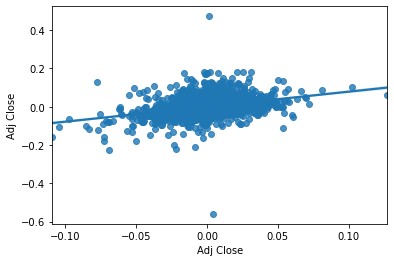

<IPython.core.display.Javascript object>

In [16]:
sns.regplot(bist30_ret, kozaa_ret)

In [17]:
# Normalize returns
kozaa_ret = (kozaa_ret - np.mean(kozaa_ret)) / np.std(kozaa_ret)
bist30_ret = (bist30_ret - np.mean(bist30_ret)) / np.std(bist30_ret)
bist30_ret = add_constant(bist30_ret)

lm = OLS(kozaa_ret, bist30_ret)
results = lm.fit()
results.summary()

C:\Users\murat\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     613.5
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          3.50e-126
Time:                        08:48:44   Log-Likelihood:                -5434.1
No. Observations:                4031   AIC:                         1.087e+04
Df Residuals:                    4029   BIC:                         1.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.648e-17      0.015   -1.8e-15      1.000      -0.029       0.029
Adj Close      0.3635      0.015     24.768      0.000       0.335       0.392
==============================================================================
Omnibus:                     1193.341   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171943.251
Skew:                           0.108   Prob(JB):                         0.00
Kurtosis:                      34.995   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>